In [1]:
from pycaret.clustering import *
import pandas as pd

In [2]:
# Load the Dataset
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df = data.copy()

In [22]:
df.dropna(inplace=True)

In [23]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [24]:
df_without_Cancellation = df[~df['InvoiceNo'].str.contains('C',na=False)].reset_index(drop=True)
df_without_Cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [25]:
df_final=df_without_Cancellation[df_without_Cancellation['UnitPrice']>0]
df_final.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [26]:
df_final['TotalSpending'] = df_final['Quantity'] * df_final['UnitPrice']

In [27]:
RFM_data = df_final.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df_final['InvoiceDate'].max() - x.max()).days,
                                                             'InvoiceNo': 'count',
                                                             'TotalSpending':'sum'
                                                             })
RFM_data.columns=['Recency','Frequency','Monetary']
RFM_data=RFM_data[RFM_data['Monetary']>0]

RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [28]:
RFM_Clustering = RFM_data.copy()

In [33]:
s = setup(RFM_Clustering, normalize = True,transformation=True,pca=True,remove_outliers=True,session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(4338, 3)"
2,Transformed data shape,"(4121, 3)"
3,Numeric features,3
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Remove outliers,True
9,Outliers threshold,0.050000


In [34]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3074,2937.0705,1.0662,0,0,0


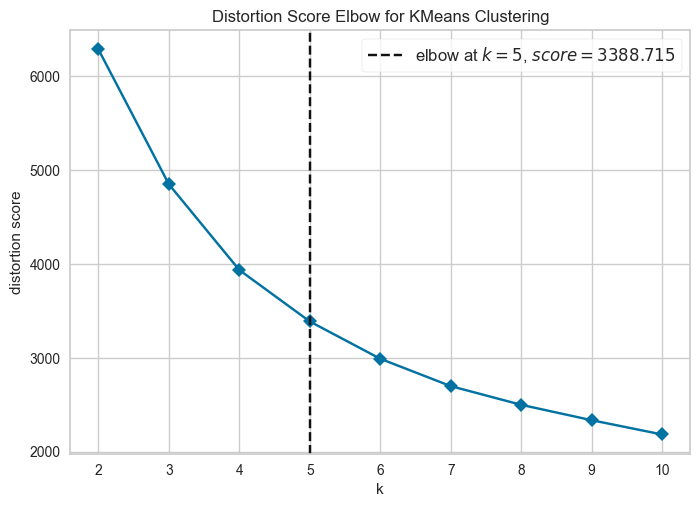

In [35]:
plot_model(kmeans, plot = 'elbow')

In [36]:
plot_model(kmeans, plot = 'cluster')